In [1]:
import geopandas
import pandas as pd

map = "./Map/Map.shp"
dados = "../scr/casos_municipio.csv"

bahia = geopandas.read_file(map)

df = pd.read_csv(dados)
df = df.drop(columns="Unnamed: 0")
df.iloc[:, 2] = df.iloc[:, 2].astype('int')
df = df.rename(columns={df.columns[2]: "Casos"})

In [3]:
bahia["Casos"] = 0

for i in range (len(bahia)):
    for j in range (len(df)):
        if bahia["MUNICIPIO"][i] == df["Município"][j]:
            bahia["Casos"][i] = df["Casos"][j]


/tmp/ipykernel_37257/3484600960.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bahia["Casos"][i] = df["Casos"][j]


Plotagem automatica

<AxesSubplot:>

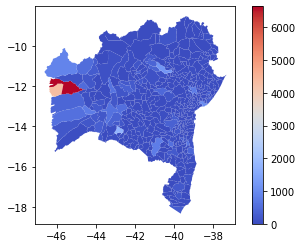

In [4]:
bahia.plot(column='Casos', cmap='coolwarm', linewidth=1, legend=True)

Plotagem baseada em quantis

<AxesSubplot:>

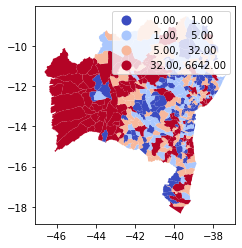

In [6]:
bahia.plot(column='Casos', scheme='quantiles', k=4, cmap='coolwarm', linewidth=1, legend=True)